In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

In [2]:
# FOR ZOOMING IN in the graph: plt.axis([xmin,xmax,ymin,ymax]) ----------- (zoom range)
def plot(x,y, title, xlabel, ylabel, zoom, zoom_range):
    a = 0
    plt.figure(figsize=(10,10)) #(I need to find a nice size)
    plt.plot(x,y, color='magenta')
    if zoom == True:
        plt.axis(zoom_range)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.axhline(y=0, color='k') #this makes the x axis appear
    plt.grid()
    plt.show()
    return a

def evaluate(range_for_evaluation, function):
    ordinate = []
    for i in range_for_evaluation:
        ordinate.append(function(i))
    return ordinate

## Numerador:

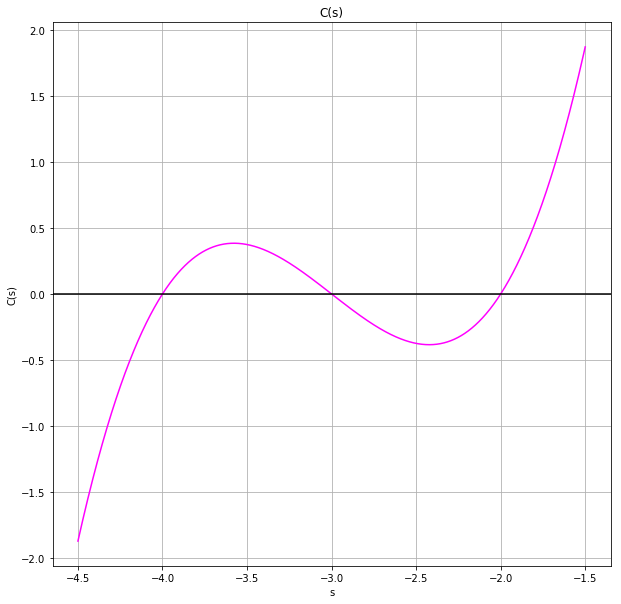

In [13]:
def C(s):
    return s**3 + 9*(s**2) + 26*s + 24

xrange = [0.0001*i for i in range(-45000, -15000)]

fc = evaluate(xrange, C)
fcplot = plot(xrange, fc, "C(s)", "s", "C(s)", False, [0,0,0,0])

## Assim, as estimativas para as raízes são: -4, -3 e -2. Como o grau do polinômio é 3, o esperado eram, de fato, 3 raízes. Verifica-se pelo gráfico que todas as raízes são reais.

## Método de Muller:

Os inputs desse programa serão x0, x1 e x2, que serão os "chutes" iniciais para as raízes.

In [21]:
def mull(x0, x1, x2, f):
    
    error = 0.5
    #contador de iterações:
    i = 0
    desired_error = 10**-4

    while error > desired_error:
    #em seguida, os parâmetros h e delta do método são determinados:
        h0 = x1 - x0
        h1 = x2 - x1

        fx1 = f(x1)
        fx0 = f(x0)
        fx2 = f(x2)

        delta0 = (fx1-fx0)/(x1-x0)
        delta1 = (fx2-fx1)/(x2-x1)

        #em seguida, os parâmetros a, b e c do método são determinados:
        a = (delta1 - delta0)/(h1 + h0)
        b = a*h1 + delta1
        c = fx2

        #x3 é determinado:

        v11 = b+(math.sqrt(-4*a*c + b**2))
        v22 = b-(math.sqrt(-4*a*c + b**2))

        v1 = math.fabs(v11)
        v2 = math.fabs(v22)

        if v1 > v2:
            x3 = x2 + (-2*c)/(b+(math.sqrt(-4*a*c + b**2)))
        if v1 < v2:
            x3 = x2 + (-2*c)/(b-(math.sqrt(-4*a*c + b**2)))
        if v1 == v2:
            x3 =  x2 + (-2*c)/b

        #o erro é computado para checar se haverá mais alguma iteração:
        error = math.fabs(100*(x3 - x2)/x3)

        x0 = x1
        x1 = x2
        x2 = x3

        i+= 1
    return x3, error, i

## Primeira raiz (menor raiz, mais negativa):

In [22]:
numerador1 = mull(-4.5, -3.5, -4.7, C) 
print(numerador1)

(-4.000000000000123, 2.329817161417153e-06, 5)


## Segunda raiz (raiz intermediária):

In [23]:
numerador2 = mull(-3.5, -2.7, -3.3, C) 
print(numerador2)

(-3.000000000000007, 5.337859339723145e-07, 5)


## Terceira raiz (maior raiz, menos negativa):

In [24]:
numerador3 = mull(-2.5, -1.7, -2.2, C) 
print(numerador3)

(-2.000000000001865, 3.056217292571254e-05, 4)


## Denominador:

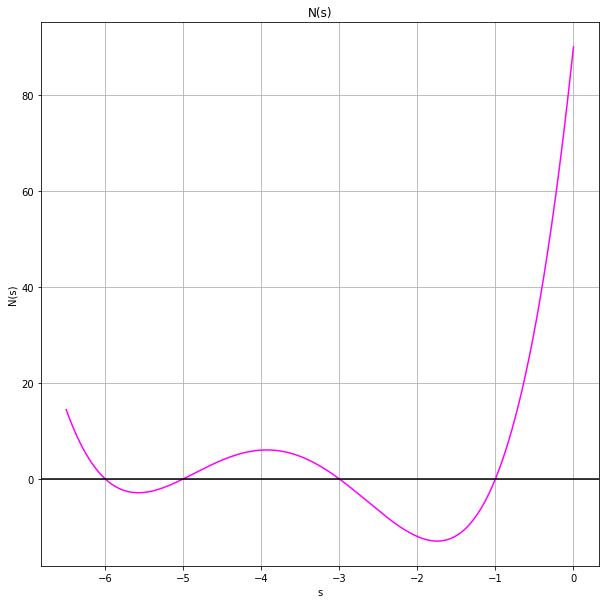

In [17]:
def N(s):
    return s**4 + 15*(s**3) + 77*(s**2) + 153*s + 90

xrange = [0.0001*i for i in range(-65000, 0)]

fn = evaluate(xrange, N)
fnplot = plot(xrange, fn, "N(s)", "s", "N(s)", False, [0,0,0,0])

## Assim, as estimativas para as raízes são: -6, -5 e -3 e -1. Como o grau do polinômio é 4, o esperado eram, de fato, 4 raízes. Todas as raízes são reais.

## Primeira raiz (menor raiz, mais negativa):

In [27]:
numerador1 = mull(-6.5, -5.2, -5.7, N) 
print(numerador1)

(-5.999999999999989, 5.153121337050009e-07, 5)


## Segunda raiz:

In [26]:
numerador2 = mull(-5.5, -4.7, -5.3, N) 
print(numerador2)

(-5.000000000000039, 9.229665920429325e-09, 5)


## Terceira raiz:

In [28]:
numerador3 = mull(-3.5, -2.7, -3.2, N) 
print(numerador3)

(-3.0000000000000075, 1.0904085338362745e-06, 4)


## Quarta raiz (maior raiz, menos negativa):

In [29]:
numerador4 = mull(-1.5, -0.7, -1.2, N) 
print(numerador4)

(-1.0000000000000142, 5.331765151605974e-06, 4)


## Comentário

## Comparação de valores:

Primeira raiz do numerador:

In [ ]:
-4.23
-3.72
-3.16
4 iterações


Primeira raiz do denominador:

In [ ]:
-4, -3.8, -3.6
6 iterações